In [67]:
import numpy as np
import pandas as pd

# Generating some random data
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)


In [68]:
pd.DataFrame(y)

,0
0,3.790933
1,1.592227
2,3.434606
3,4.313037
4,3.905760
...,...
195,3.416751
196,6.626565
197,2.803299
198,4.081686


In [69]:
import matplotlib.pyplot as plt

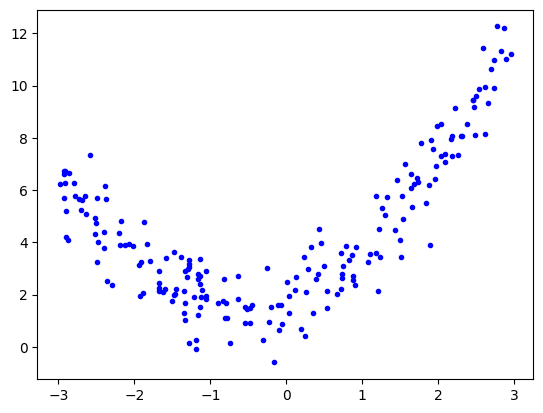

In [70]:
plt.plot(X,y,'b.')

In [71]:
from sklearn.linear_model import LinearRegression, Ridge
lr = LinearRegression()

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
print('Using Linear Regression, the Mean Squared Error is : ',mean_squared_error(y_test,y_pred))
print('Using Linear Regression, the R2 Score is : ',r2_score(y_test,y_pred))

Using Linear Regression, the Mean Squared Error is :  4.909973509871369
Using Linear Regression, the R2 Score is :  0.0987530540115259


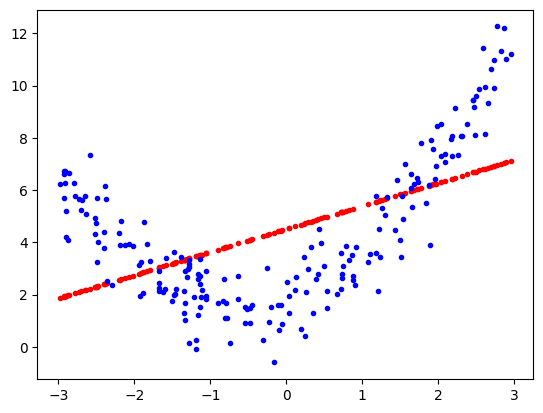

In [75]:
plt.plot(X_train,lr.predict(X_train),'r.')
plt.plot(X,y,'b.')

In [76]:
# Adding Plynomial Features to perform Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=20)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [77]:
lr.fit(X_train_poly,y_train)
y_pred1 = lr.predict(X_test_poly)

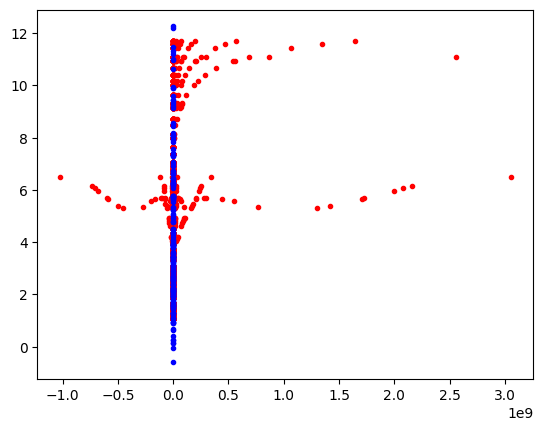

In [78]:
plt.plot(X_train_poly,lr.predict(X_train_poly),'r.')
plt.plot(X,y,'b.')

In [79]:
print('Using LR after adding Polynomial Features, the Mean Squared Error is : ',mean_squared_error(y_test,y_pred1))
print('Using LR after adding Polynomial Features, the R2 Score is : ',r2_score(y_test,y_pred1))

Using LR after adding Polynomial Features, the Mean Squared Error is :  1.0605712264374483
Using LR after adding Polynomial Features, the R2 Score is :  0.8053275487315121


In [80]:
r = Ridge(alpha=15)
r.fit(X_train_poly,y_train)
y_pred2 = r.predict(X_test_poly)
print('Using Ridge Regression, the Mean Squared Error is : ',mean_squared_error(y_test,y_pred2))
print('Using Ridge Regression, the R2 Score is : ',r2_score(y_test,y_pred2))

Using Ridge Regression, the Mean Squared Error is :  1.0106078325657983
Using Ridge Regression, the R2 Score is :  0.8144985465072665


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.76511e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


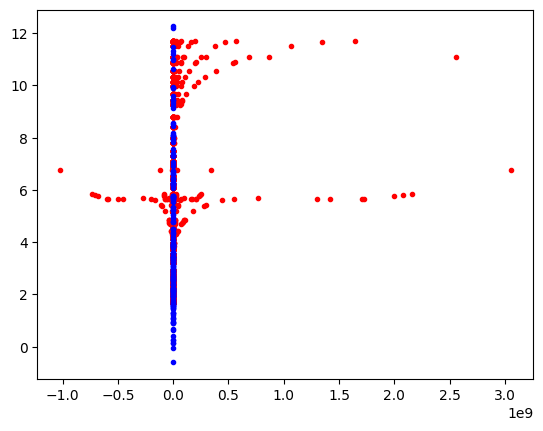

In [81]:
plt.plot(X_train_poly,r.predict(X_train_poly),'r.')
plt.plot(X,y,'b.')